<a href="https://colab.research.google.com/github/zzwony/Start_0920/blob/main/12_12_pretrainedmodel_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 모델의 발전

* 1998: LeNet – Gradient-based Learning Applied to Document Recognition
* 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
* **2014: VggNet – Very Deep Convolutional Networks for Large-Scale Image Recognition**
* **2014: GooLeNet – Going Deeper with Convolutions**
* 2014: SppNet – Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
* **2015: ResNet – Deep Residual Learning for Image Recognition**
* **2016: Xception – Xception: Deep Learning with Depthwise Separable Convolutions**
* **2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application**


* **2017: DenseNet – Densely Connected Convolutional Networks**
* 2017: SeNet – Squeeze and Excitation Networks
* 2017: ShuffleNet – ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
* **2018: NasNet – Learning Transferable Architectures for Scalable Image Recognition**
* 2018: Bag of Tricks – Bag of Tricks for Image Classification with Convolutional Neural Networks
* **2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**


In [ ]:
# VGG19
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

vggnet = VGG19(include_top=True, weights='imagenet',
               input_tensor=None, input_shape=None,
               pooling=None, classes=1000)

vggnet.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!wget -O dog.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg


--2022-12-12 05:40:45--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 104.20.44.162, 172.67.2.204, 104.20.45.162, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|104.20.44.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94395 (92K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  92.18K  --.-KB/s    in 0.02s   

2022-12-12 05:40:45 (5.72 MB/s) - ‘dog.jpg’ saved [94395/94395]



35363/35363 [==============================] - 0s 0us/step
[[('n02088364', 'beagle', 0.8395563), ('n02089973', 'English_foxhound', 0.088256225), ('n02089867', 'Walker_hound', 0.062316105), ('n02088238', 'basset', 0.0045584366), ('n02088632', 'bluetick', 0.003336786)]]


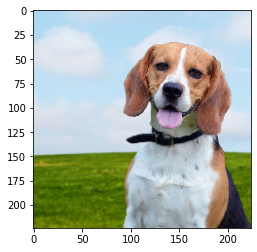

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

img = tf.keras.preprocessing.image.load_img('dog.jpg', target_size=(224, 224))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)
preds = vggnet.predict(x)
print(decode_predictions(preds))

In [ ]:
# GoogLeNet, Inception
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

inception = InceptionV3(include_top=True, weights='imagenet',
                        input_tensor=None, input_shape=None,
                        pooling=None, classes=1000)

inception.summary()

96112376/96112376 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [ ]:
!wget -O fish.jpg https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg

--2022-12-12 05:51:58--  https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4648040 (4.4M) [image/jpeg]
Saving to: ‘fish.jpg’

fish.jpg            100%[===================>]   4.43M  16.8MB/s    in 0.3s    

2022-12-12 05:51:58 (16.8 MB/s) - ‘fish.jpg’ saved [4648040/4648040]



1/1 [==============================] - 2s 2s/step
[[('n01443537', 'goldfish', 0.97491646), ('n02701002', 'ambulance', 0.002322469), ('n02606052', 'rock_beauty', 0.0019010364), ('n02607072', 'anemone_fish', 0.0006638443), ('n09256479', 'coral_reef', 0.00043053948)]]


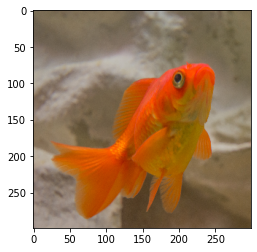

In [ ]:
from keras.layers import preprocessing
from keras import layers
img = tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(299, 299))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = inception.predict(x)
print(decode_predictions(preds))

1/1 [==============================] - 0s 22ms/step
[[('n03788365', 'mosquito_net', 0.07202596), ('n01498041', 'stingray', 0.029412735), ('n15075141', 'toilet_tissue', 0.022300882), ('n04209239', 'shower_curtain', 0.01827739), ('n01737021', 'water_snake', 0.01652322)]]


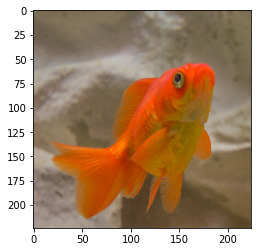

In [ ]:
from keras.layers import preprocessing
from keras import layers
img = tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(224, 224))
plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = vggnet.predict(x)
print(decode_predictions(preds))

In [ ]:
# Resnet
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions

resnet = ResNet50(include_top=True, weights='imagenet',
                        input_tensor=None, input_shape=None,
                        pooling=None, classes=1000)

resnet.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
!wget -O bee.jpg https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg

--2022-12-12 06:14:04--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2421052 (2.3M) [image/jpeg]
Saving to: ‘bee.jpg’

bee.jpg             100%[===================>]   2.31M  12.1MB/s    in 0.2s    

2022-12-12 06:14:05 (12.1 MB/s) - ‘bee.jpg’ saved [2421052/2421052]



1/1 [==============================] - 1s 1s/step
[[('n02206856', 'bee', 0.9990977), ('n03530642', 'honeycomb', 0.0005626475), ('n02190166', 'fly', 0.00014329139), ('n02727426', 'apiary', 0.000101743004), ('n02219486', 'ant', 5.761081e-05)]]


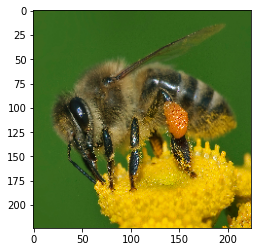

In [ ]:
img = tf.keras.preprocessing.image.load_img('bee.jpg', target_size=(224, 224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = resnet.predict(x)
print(decode_predictions(preds))

#### Xception
- Inception module 을 이용하여 depthwise convolution 적용

In [ ]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

xception = Xception(include_top=True, weights='imagenet',
                        input_tensor=None, input_shape=None,
                        pooling=None, classes=1000)

xception.summary()

91884032/91884032 [==============================] - 0s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

In [ ]:
!wget -O beaver.jpg https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg

--2022-12-12 06:26:50--  https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186747 (182K) [image/jpeg]
Saving to: ‘beaver.jpg’

beaver.jpg          100%[===================>] 182.37K  --.-KB/s    in 0.08s   

2022-12-12 06:26:50 (2.20 MB/s) - ‘beaver.jpg’ saved [186747/186747]



1/1 [==============================] - 1s 926ms/step
[[('n02363005', 'beaver', 0.82792246), ('n02361337', 'marmot', 0.05973949), ('n02493509', 'titi', 0.0044218353), ('n02442845', 'mink', 0.002409179), ('n01883070', 'wombat', 0.001986417)]]


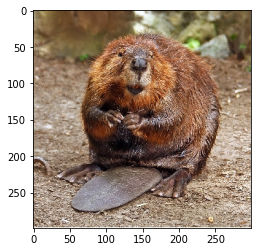

In [ ]:
img = tf.keras.preprocessing.image.load_img('beaver.jpg', target_size=(299, 299))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = xception.predict(x)
print(decode_predictions(preds))

## MobileNet

* 성능보다 모델의 크기 또는 연산 속도 감소
* Depthwise conv와 Pointwise conv 사이에도 batch normalization(베치마다 정규화하는 것을 말한다.
)과 ReLU를 삽입
* Conv layer를 활용한 모델과 정확도는 비슷하면서 계산량은 9배, 파라미터 수는 7배 줄임
* 경량화를 하는데 성공을 했다.


In [ ]:
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

mobilenet = MobileNet(include_top=True, weights='imagenet',
                        input_tensor=None, input_shape=None,
                        pooling=None, classes=1000)

mobilenet.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [ ]:
!wget -O cranes.jpg https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg


--2022-12-12 06:38:03--  https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg
Resolving p1.pxfuel.com (p1.pxfuel.com)... 104.21.71.48, 172.67.169.122, 2606:4700:3035::6815:4730, ...
Connecting to p1.pxfuel.com (p1.pxfuel.com)|104.21.71.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86911 (85K) [image/jpeg]
Saving to: ‘cranes.jpg’

cranes.jpg          100%[===================>]  84.87K  --.-KB/s    in 0.02s   

2022-12-12 06:38:03 (5.42 MB/s) - ‘cranes.jpg’ saved [86911/86911]



1/1 [==============================] - 1s 503ms/step
[[('n03126707', 'crane', 0.9925022), ('n03240683', 'drilling_platform', 0.0030644208), ('n03216828', 'dock', 0.0027343023), ('n03344393', 'fireboat', 0.00060727313), ('n03532672', 'hook', 0.0002015284)]]


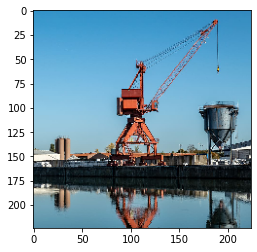

In [ ]:
img = tf.keras.preprocessing.image.load_img('cranes.jpg', target_size=(224, 224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = mobilenet.predict(x)
print(decode_predictions(preds))

## DenseNet

* 각 층은 모든 앞 단계에서 올 수 있는 지름질 연결 구성
* 특징지도의 크기를 줄이기 위해 풀링 연산 적용 필요
* 밀집 블록(dense block)과 전이층(transition layer)으로 구성 
* 전이층 : 1x1 컨볼루션과 평균값 풀링(APool)으로 구성   

<img src="https://oi.readthedocs.io/en/latest/_images/cnn_vs_resnet_vs_densenet.png" width="700">


In [ ]:
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions

densenet = DenseNet201(include_top=True, weights='imagenet',
                        input_tensor=None, input_shape=None,
                        pooling=None, classes=1000)

densenet.summary()

82524592/82524592 [==============================] - 0s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_7[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

In [ ]:
!wget -O zebra.jpg https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg

--2022-12-12 06:41:00--  https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188036 (184K) [image/jpeg]
Saving to: ‘zebra.jpg’

zebra.jpg           100%[===================>] 183.63K  --.-KB/s    in 0.09s   

2022-12-12 06:41:00 (2.06 MB/s) - ‘zebra.jpg’ saved [188036/188036]



1/1 [==============================] - 4s 4s/step
[[('n02391049', 'zebra', 0.9313704), ('n01518878', 'ostrich', 0.019789279), ('n02423022', 'gazelle', 0.011574086), ('n02397096', 'warthog', 0.00462196), ('n02422106', 'hartebeest', 0.0031491134)]]


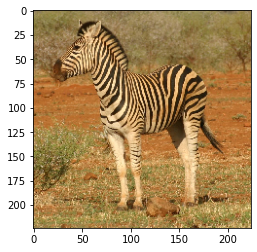

In [ ]:
img = tf.keras.preprocessing.image.load_img('zebra.jpg', target_size=(224, 224))
plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
x = preprocess_input(x)

preds = densenet.predict(x)
print(decode_predictions(preds))

[ 과제 ]

6개 이미지에 대해서 6개 사전학습모델을 이용해서 가장 성능이 좋은 경우 3개와

안좋은 경우 1개를 제시하세요. (중요 특성도 파악하기)

< 가장 성능이 좋은 모델 3가지 >
* 1. Resnet: 0.999
* 중요한 특징: 잔차 연결, 어떤 층을 거친 출력값에 그 층에 들어왔던 입력값을 그대로 더해주는것을 말한다.

* 2. MobileNet: 0.992
* 중요한 특징: Flatten(평탄화 작업) 연산을 하기 전에 맨 아래 층을 가지고 진행한다(이 층을 '병목 층'이라 한다./ 일반성을 유지함)

* 3. DenseNet: 0.93
* 중요한 특징: 기울기 소실 문제해결과 중요한 feature만을 이용해 매우 깊은 네트워크를 학습하여 성능을 상승시킨다. 

< 가장 성능이 안좋은 모델 1가지 >
* Xception: 0.83
* 중요한 특징: 분리 합성곱 층은 입력 채널마다 하나의 공간 필터만 가지기 때문에 입력층과 같이 채널이 너무 적은 층 다음에 사용하는 것은 피해야 한다.